In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy

 
sns.set()


In [ ]:
from google.colab import files 
uploaded=files.upload() 
df=pd.read_csv('PCOS_infertility2.csv') 
#dataset=df.values 


Saving PCOS_infertility2.csv to PCOS_infertility2.csv


In [ ]:
df.head()

,PCOS (Y/N),I beta-HCG(mIU/mL),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,Weight (Kg),BMI,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg Exercise(Y/N)
0,0,1.99,5,7.0,0,0,44.6,19.300000,0,0,0,0,0,1.0,0
1,0,60.80,5,11.0,1,0,65.0,24.921163,0,0,0,0,0,0.0,0
2,1,494.08,5,10.0,1,0,68.8,25.270891,0,0,0,1,1,1.0,0
3,0,1.99,5,4.0,0,0,65.0,29.674945,0,0,0,0,0,0.0,0
4,0,801.45,5,1.0,1,0,52.0,20.060954,0,0,0,1,0,0.0,0


In [ ]:
df.shape


(541, 15)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1     I   beta-HCG(mIU/mL)  541 non-null    float64
 2   Cycle length(days)      541 non-null    int64  
 3   Marriage Status (Yrs)   540 non-null    float64
 4   Pregnant(Y/N)           541 non-null    int64  
 5   No of aborptions        541 non-null    int64  
 6   Weight (Kg)             541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Weight gain(Y/N)        541 non-null    int64  
 9   hair growth(Y/N)        541 non-null    int64  
 10  Skin darkening (Y/N)    541 non-null    int64  
 11  Hair loss(Y/N)          541 non-null    int64  
 12  Pimples(Y/N)            541 non-null    int64  
 13  Fast food (Y/N)         540 non-null    float64
 14  Reg Exercise(Y/N)       541 non-null    in

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.00
I beta-HCG(mIU/mL),541.0,664.549235,3348.920576,1.300000,1.990000,20.000000,297.210000,32460.97
Cycle length(days),541.0,4.940850,1.492020,0.000000,4.000000,5.000000,5.000000,12.00
Marriage Status (Yrs),540.0,7.680926,4.803835,0.000000,4.000000,7.000000,10.000000,30.00
Pregnant(Y/N),541.0,0.380776,0.486027,0.000000,0.000000,0.000000,1.000000,1.00
No of aborptions,541.0,0.288355,0.692575,0.000000,0.000000,0.000000,0.000000,5.00
Weight (Kg),541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.00
BMI,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.90
Weight gain(Y/N),541.0,0.377079,0.485104,0.000000,0.000000,0.000000,1.000000,1.00
hair growth(Y/N),541.0,0.273567,0.446202,0.000000,0.000000,0.000000,1.000000,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


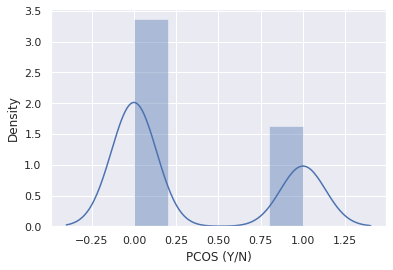

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


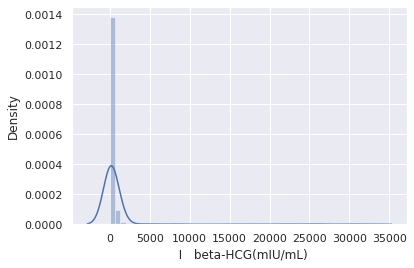

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


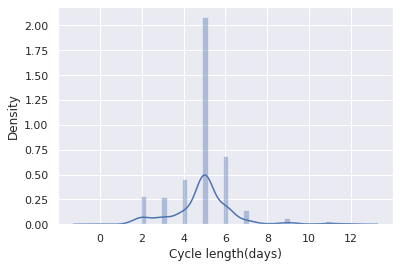

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


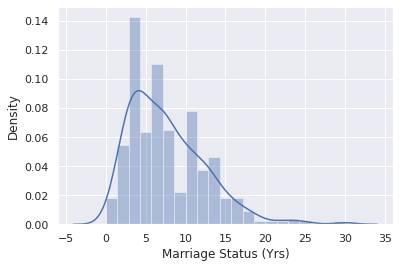

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


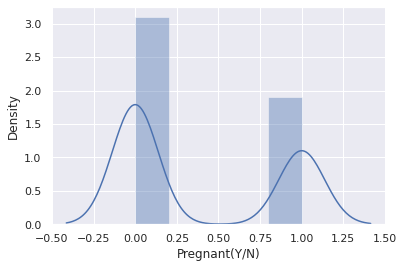

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


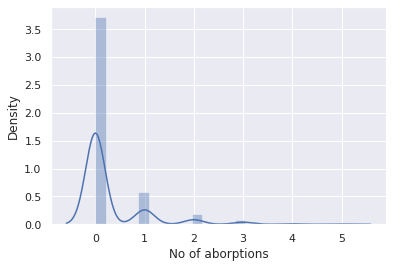

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


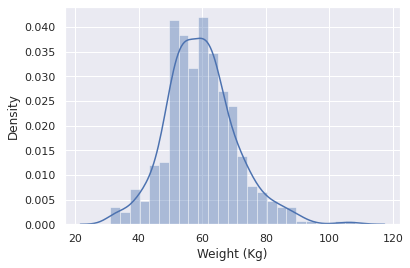

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


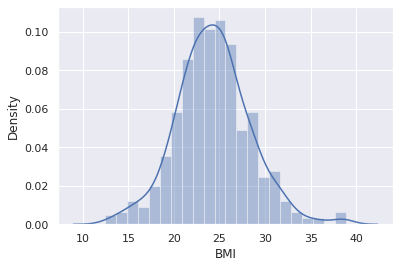

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


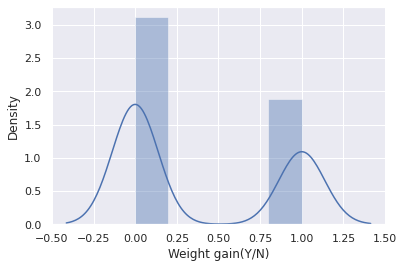

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


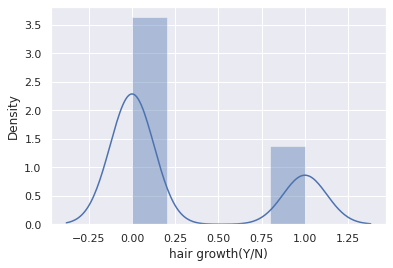

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


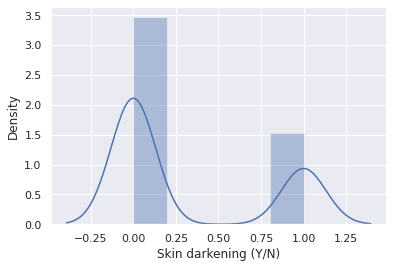

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


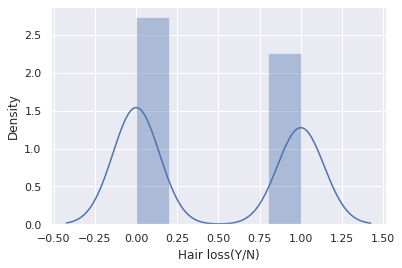

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


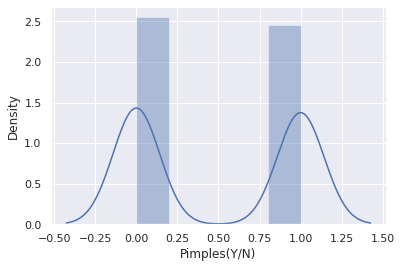

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


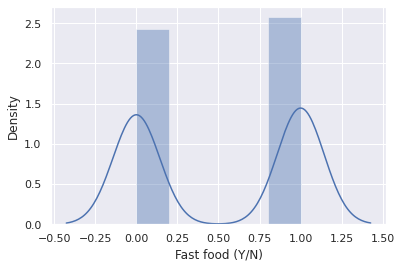

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


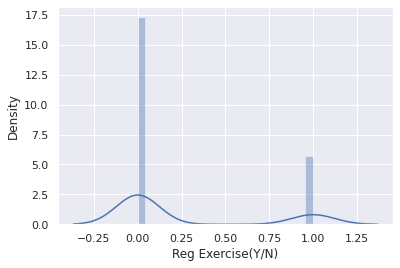

In [ ]:
data_feature = df.columns

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

In [ ]:
df=df.drop(columns=['Skin darkening (Y/N)'])   

In [ ]:
df=df.drop(columns=['  I   beta-HCG(mIU/mL)'])  

In [ ]:
df=df.drop(['hair growth(Y/N)'],axis=1) 

In [ ]:
df=df.drop(['BMI'],axis=1) 

In [ ]:
df=df.drop(['Weight gain(Y/N)'],axis=1)  

In [ ]:
df= df.dropna(axis='rows')

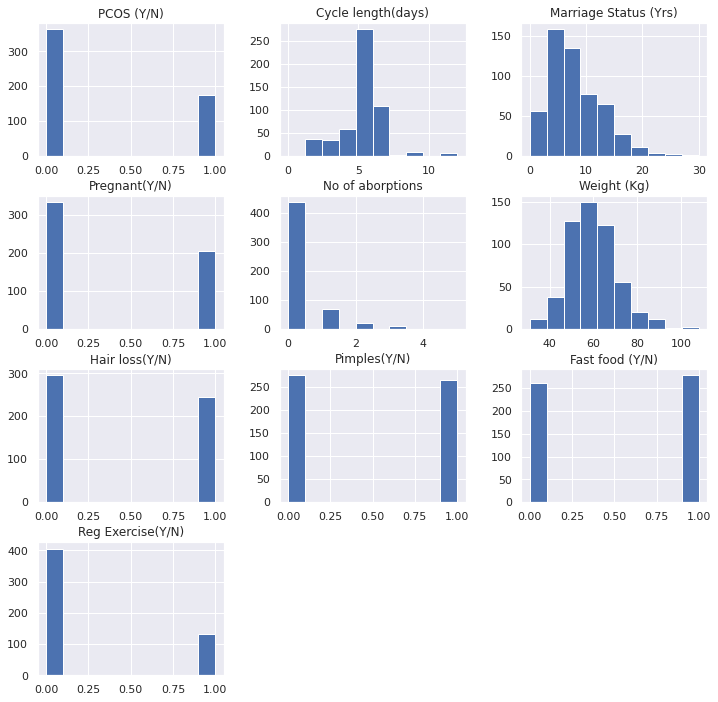

In [ ]:
p = df.hist(figsize = (12,12))

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),539.0,0.326531,0.469380,0.0,0.0,0.0,1.0,1.0
Cycle length(days),539.0,4.938776,1.491600,0.0,4.5,5.0,5.0,12.0
Marriage Status (Yrs),539.0,7.685900,4.806906,0.0,4.0,7.0,10.0,30.0
Pregnant(Y/N),539.0,0.382189,0.486374,0.0,0.0,0.0,1.0,1.0
No of aborptions,539.0,0.289425,0.693638,0.0,0.0,0.0,0.0,5.0
Weight (Kg),539.0,59.637291,11.041874,31.0,52.0,59.0,65.0,108.0
Hair loss(Y/N),539.0,0.452690,0.498219,0.0,0.0,0.0,1.0,1.0
Pimples(Y/N),539.0,0.491651,0.500395,0.0,0.0,0.0,1.0,1.0
Fast food (Y/N),539.0,0.515770,0.500215,0.0,0.0,1.0,1.0,1.0
Reg Exercise(Y/N),539.0,0.246753,0.431522,0.0,0.0,0.0,0.0,1.0


In [ ]:
df['Cycle length(days)'] = df['Cycle length(days)'].fillna(df['Cycle length(days)'].mean())


In [ ]:
for i in range(10):
    print(df.columns[i])


PCOS (Y/N)
Cycle length(days)
Marriage Status (Yrs)
Pregnant(Y/N)
No of aborptions
Weight (Kg)
Hair loss(Y/N)
Pimples(Y/N)
Fast food (Y/N)
Reg Exercise(Y/N)


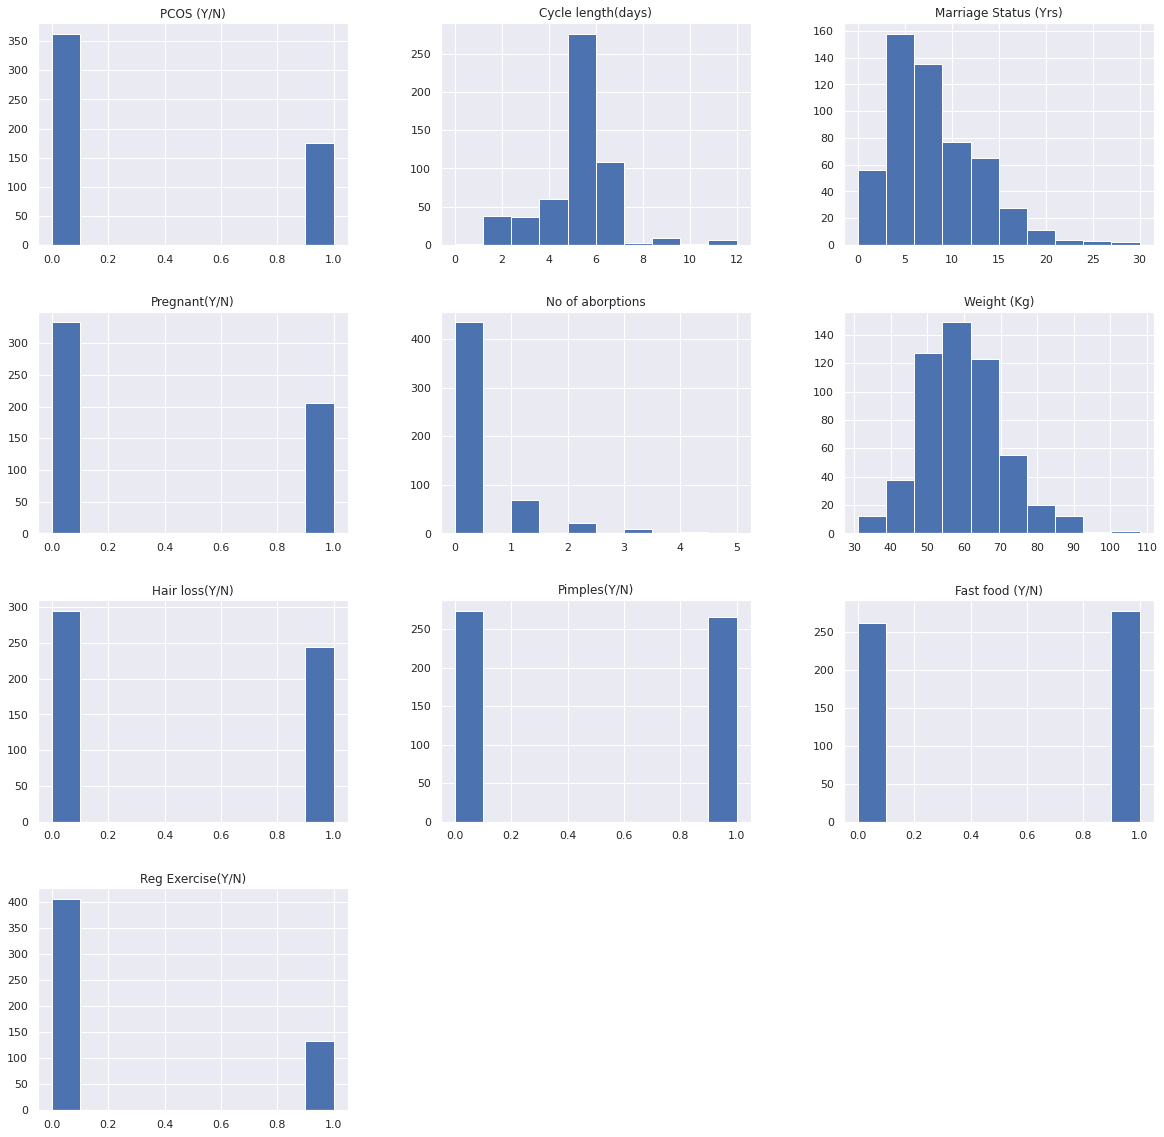

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
#sns.pairplot(data =df)
plt.show()

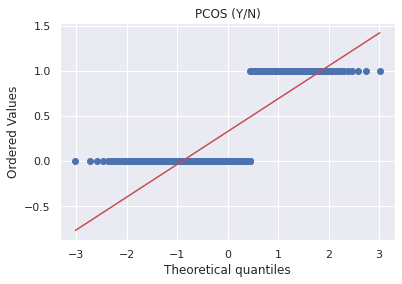

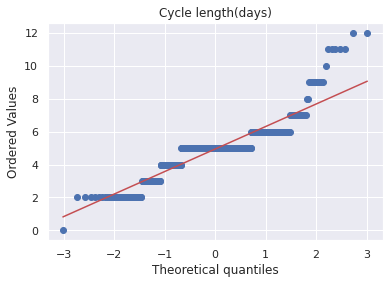

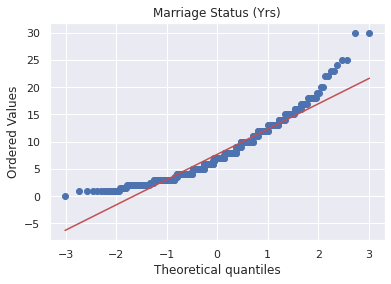

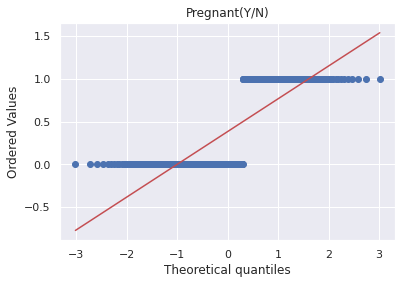

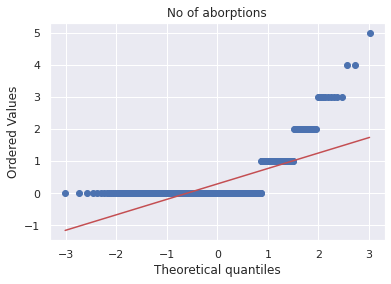

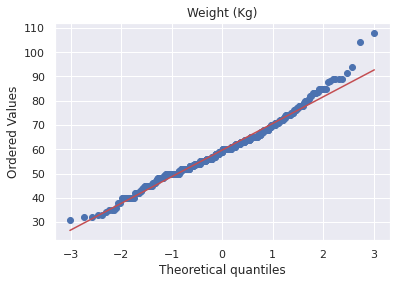

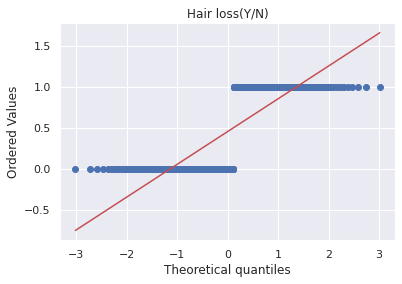

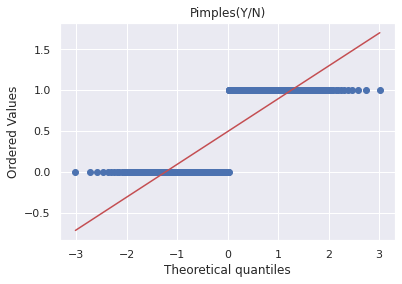

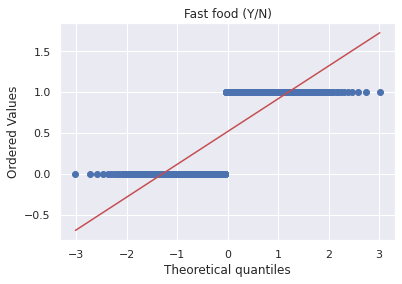

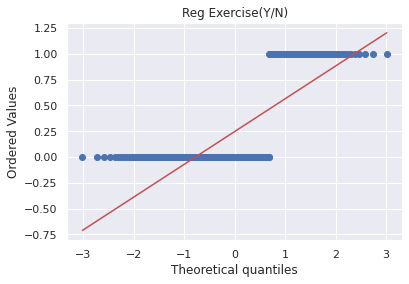

In [ ]:
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature], plot = plt)
    plt.title(feature)
    plt.show()

In [ ]:
df.head()


,PCOS (Y/N),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,Weight (Kg),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg Exercise(Y/N)
0,0,5,7.0,0,0,44.6,0,0,1.0,0
1,0,5,11.0,1,0,65.0,0,0,0.0,0
2,1,5,10.0,1,0,68.8,1,1,1.0,0
3,0,5,4.0,0,0,65.0,0,0,0.0,0
4,0,5,1.0,1,0,52.0,1,0,0.0,0


In [ ]:
X = df.iloc[:,1 :-1]
y = df.iloc[:, 0]


In [ ]:
X.head()


,Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,Weight (Kg),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N)
0,5,7.0,0,0,44.6,0,0,1.0
1,5,11.0,1,0,65.0,0,0,0.0
2,5,10.0,1,0,68.8,1,1,1.0
3,5,4.0,0,0,65.0,0,0,0.0
4,5,1.0,1,0,52.0,1,0,0.0


In [ ]:
y.head()


0    0
1    0
2    1
3    0
4    0
Name: PCOS (Y/N), dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(df) 
scaled_data=scaler.transform(df) 
scaled_data 

array([[-0.69631062,  0.04108433, -0.14282305, ..., -0.98343952,
         0.96894217, -0.57235147],
       [-0.69631062,  0.04108433,  0.69008608, ..., -0.98343952,
        -1.03205334, -0.57235147],
       [ 1.43614066,  0.04108433,  0.48185879, ...,  1.01683935,
         0.96894217, -0.57235147],
       ...,
       [-0.69631062,  0.71212835,  0.06540423, ..., -0.98343952,
        -1.03205334, -0.57235147],
       [-0.69631062, -1.97204773, -1.18395947, ...,  1.01683935,
        -1.03205334, -0.57235147],
       [ 1.43614066,  1.38317237, -1.18395947, ...,  1.01683935,
         0.96894217, -0.57235147]])

In [ ]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=2) 

pca.fit(scaled_data) 
x_pca=pca.transform(scaled_data) 


In [ ]:
scaled_data.shape 

(539, 10)

In [ ]:
x_pca.shape 

(539, 2)

In [ ]:
from sklearn.model_selection import train_test_split 
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 0) 

In [ ]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [ ]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [ ]:
def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")

In [ ]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")


In [ ]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [ ]:
def logistic_regression (X_train,X_test,y_train,y_test):

  from sklearn.linear_model import LogisticRegression
  model = LogisticRegression(random_state = 0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  
  return print(f"Train score : {model.score(X_train, y_train)}\nTest score : {model.score(X_test, y_test)}")

In [ ]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)
    
    print("-"*100)
    print()

    print("logistic Regression:\n")
    logistic_regression(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

In [ ]:
print_score(X_train, X_test, y_train, y_test)


SVM:

Train score : 0.7378190255220418
Test score : 0.8148148148148148
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.7865429234338747
Test score : 0.7129629629629629
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.7354988399071926
Test score : 0.8148148148148148
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.6574074074074074
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.7037037037037037
----------------------------------------------------------------------------------------------------

logistic Regression:

Train score : 0.7378190255220418
Test score : 0.8148148148148148
--------------------------------------------------------

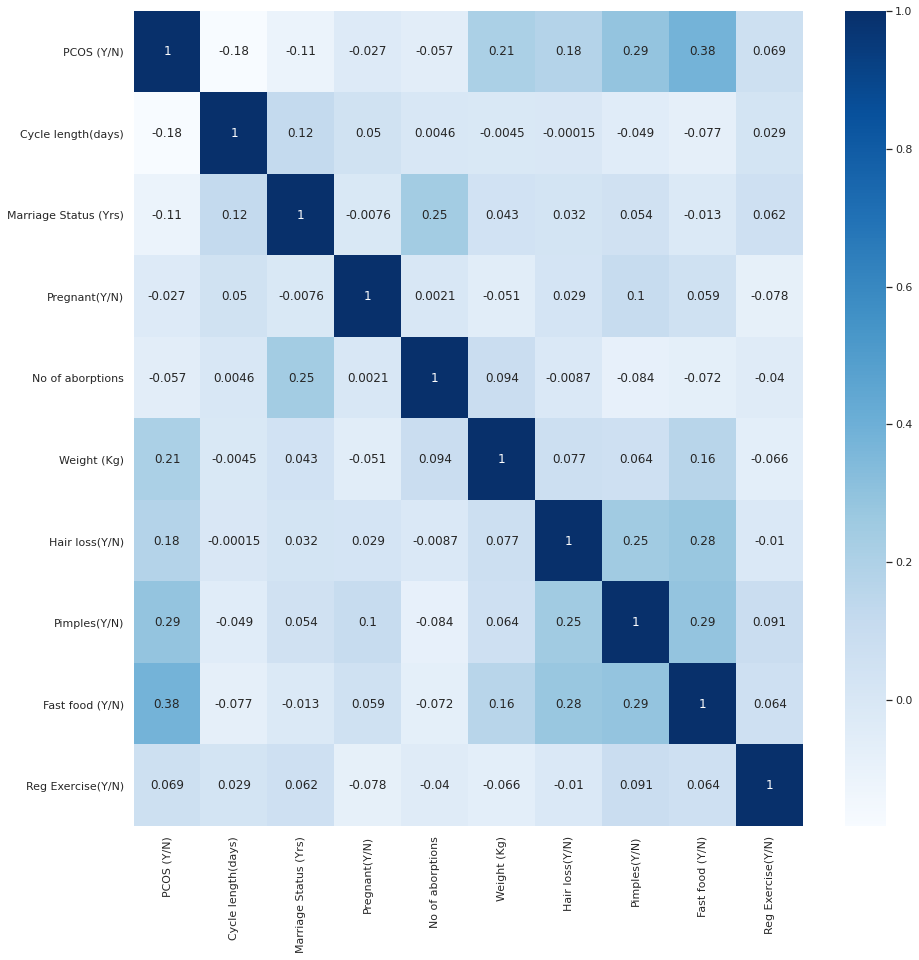

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show() 

In [ ]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm
print(cm)


[[68 20]
 [12  8]]


In [ ]:
from sklearn.metrics import confusion_matrix
classifier_forest = GaussianNB()
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[88  0]
 [20  0]]


In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,88,88
1,20,20
All,108,108


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        88
           1       0.00      0.00      0.00        20

    accuracy                           0.81       108
   macro avg       0.41      0.50      0.45       108
weighted avg       0.66      0.81      0.73       108



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

model=XGBClassifier() 
model.fit(X_train,y_train) 
y_pred=model.predict(X_test) 
accu=accuracy_score(y_test,y_pred) 
accu=accuracy_score(y_test,y_pred) 
print(accu) 

0.7407407407407407


In [ ]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.metrics import accuracy_score 
model = BaggingClassifier() 
model.fit(X_train,y_train) 
y_pred=model.predict(X_test) 
accu=accuracy_score(y_test,y_pred) 
accu=accuracy_score(y_test,y_pred) 
print(accu)  

0.6759259259259259


In [ ]:
 import pickle
 filename = 'PCOS.pkl' 
 pickle.dump(classifier_forest, open(filename, 'wb')) 

In [ ]:
from flask import Flask, request, render_template
import pickle
import numpy as np

app = Flask(__name__)
model = pickle.load(open('PCOS.pkl', 'rb')) 


@app.route('/')
def home():
    return render_template('home.html')


@app.route('/predict', methods = ['GET', 'POST'])
def predict():

    int_features = [x for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    print(prediction)
    output = prediction[0]
    
    if output == 0:
        return render_template('home.html', prediction_text= 'PCOS : No')
    else:
        return render_template('home.html', prediction_text= 'PCOS : Yes') 


if __name__ == "__main__":
    app.run(debug=True) 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
